# Statistical Learning Project

## Data Description:
    The data at hand contains medical costs of people characterized by certain attributes.

## Domain: Healthcare

## Context:
    Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.

## Attribute Information:
1. age: age of primary beneficiary
2. sex: insurance contractor gender, female, male
3. bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,           objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
4. children: Number of children covered by health insurance / Number of dependents
5. smoker: Smoking
6. region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
7. charges: Individual medical costs billed by health insurance.

## Learning Outcomes:
1. Exploratory Data Analysis
2. Practicing statistics using Python
3. Hypothesis testing


# Objective:
We want to see if we can dive deep into this data to find some valuable insights.




# Steps and tasks:
1. Import the necessary libraries (2 marks)
2. Read the data as a data frame (2 marks)
3. Perform basic EDA which should include the following and print out your insights at every step. (28 marks)
	a. Shape of the data (2 marks)
    
	b. Data type of each attribute (2 marks)
	
    c. Checking the presence of missing values (3 marks)
	
    d. 5 point summary of numerical attributes (3 marks)
	
    e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns. (4 marks)
	
    f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns (2 marks)
	
    g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns (4 marks)
	
    h. Distribution of categorical columns (include children) (4 marks)
	
    i. Pair plot that includes all the columns of the data frame (4 marks)
    
    
4. Answer the following questions with statistical evidence (28 marks)
	a. Do charges of people who smoke differ significantly from the people who don't? (7 marks)
    
	b. Does bmi of males differ significantly from that of females? (7 marks)
	
    c. Is the proportion of smokers significantly different in different genders? (7 marks)
	
    d. Is the distribution of bmi across women with no children, one child and two children, the same? (7 marks)


# References:
	 Applications of Data science in insurance domain : https://medium.com/activewizards-machine-learning-company/top-10-data-science-use-cases-in-insurance-8cade8a13ee1
	 Data science in Insurance : https://www.mastersindatascience.org/industry/insurance/


## Scoring guide (Rubric) - Applied Statistics Rubric

### Criteria                                            																							  Points
1. Import the necessary libraries																		2
2. Read the data as a data frame																		2
3. EDA - shape & type of Data																			4
4. EDA - Checking the presence of missing values														3
5. EDA - 5 point summary of numerical attributes														3
6. EDA - Distribution of ‘bmi’, ‘age’ and ‘charges’ columns												4
7. EDA - Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns										2
8. EDA - Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns							4
9. EDA - Distribution of categorical columns															4
10. EDA - Pair plot that includes all the columns of the data frame										4
11. Do charges of people who smoke differ significantly from the people who don't?						7
12. Does bmi of males differ significantly from that of females											7
13. Is the proportion of smokers significantly different in different genders							7
14. Is the distribution of bmi across women with no children, one child and two children, the same		7


# Step 01: Import the necessary libraries

In [1]:
# importig libraries

import builtins as BUILTINS
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # seanborn library
import matplotlib.pyplot as plt # Plotting library
%matplotlib inline
from scipy.stats import kurtosis, skew, stats, chi2_contingency
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
import copy

sns.set(color_codes = True)

# help(BUILTINS)

# Step 02: Reading the data as a data frame

In [2]:
# CSV data file inside my project directory and executed the following code to fetch the data into a variable.
insurance_df = pd.read_csv("insurance.csv")

In [3]:
# The head function on the variable to check whether the data has been fetched successfully or not.

print('##########    HEAD   ##########')
print(insurance_df.head())
print(insurance_df.head(19).T)

##########    HEAD   ##########
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
                  0          1          2          3          4          5  \
age              19         18         28         33         32         31   
sex          female       male       male       male       male     female   
bmi            27.9      33.77         33     22.705      28.88      25.74   
children          0          1          3          0          0          0   
smoker          yes         no         no         no         no         no   
region    southwest  southeast  southeast  northwest  northwest  southeast   
charges     16884.9    1725.55    4449

In [4]:
print('##########    TAIL   ##########')
print(insurance_df.tail())
print(insurance_df.tail(10).T)

##########    TAIL   ##########
      age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603
               1328       1329       1330       1331       1332       1333  \
age              23         52         57         23         52         50   
sex          female       male     female     female     female       male   
bmi          24.225       38.6      25.74       33.4       44.7      30.97   
children          2          2          2          0          3          3   
smoker           no         no         no         no         no         no   
region    northeast  southwest  southeast  southwest  southwest  northwest   
charges     22395.7    10325.2  

In [5]:
print('Length of insurnace data : ', len(insurance_df))

Length of insurnace data :  1338


# Step 03: Perform Basic EDA which should include the following
## Print out insights at every step.
	a. Shape of the data (2 marks)
	b. Data type of each attribute (2 marks)
	c. Checking the presence of missing values (3 marks)
	d. 5 point summary of numerical attributes (3 marks)
	e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns. (4 marks)
	f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns (2 marks)
	g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns (4 marks)
	h. Distribution of categorical columns (include children) (4 marks)
	i. Pair plot that includes all the columns of the data frame (4 marks)

### a. Shape of the data

In [6]:
print('Shape : ', insurance_df.shape)
#Observation: here are 1338 observations and 7 columns for insurance dataset.
print('The columns of the insurnace data : ', insurance_df.columns)

Shape :  (1338, 7)
The columns of the insurnace data :  Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


### b. Data type of each attribute

In [7]:
# Checking the information & data types of the columns.
print('Infomraiton of the insurance data frame : \n')
print(insurance_df.info())
print()
print('Data Types of the insurance data frame : ')
print(insurance_df.dtypes)

Infomraiton of the insurance data frame : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Data Types of the insurance data frame : 
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


### c. Checking the presence of missing values

In [8]:
# There are no Null Values in the insurance dataset
print('Checking for Null Values :\n')
print(insurance_df.isnull().sum())

Checking for Null Values :

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


#### There are no null values in the data frame.

### d. 5 point summary of numerical attributes

Descriptive or summary statistics in python – pandas, can be obtained by using describe function – describe(). Describe Function gives the mean, std and IQR values.

Generally describe() function excludes the character columns and gives summary statistics of numeric columns
We need to add a variable named include=’all’ to get the summary statistics or descriptive statistics of both numeric and character column.

1. The five point summary is a set of functions in statistics that tell something about a data set. This includes the minimum, the maximum, the standard deviation, the mean and the median.


2. describe() Function gives the mean, std and IQR values. It excludes character column and calculate summary statistics only for numeric columns.


3. describe() Function with an argument named include along with value object i.e include=’object’ gives the summary statistics of the character columns.


4. describe() Function with include=’all’ gives the summary statistics of all the columns.




describe() Function gives the mean, std and IQR values. It excludes character column and calculate summary statistics only for numeric columns.

In [9]:
# Describe - Summary statistics only for numeric columns
print(insurance_df.describe)

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>


describe() Function gives the mean, std and IQR values. It excludes character column and calculate summary statistics only for numeric columns

In [10]:
# Describe - Summary statistics only for numeric columns
print(insurance_df.describe(include=['object']))

         sex smoker     region
count   1338   1338       1338
unique     2      2          4
top     male     no  southeast
freq     676   1064        364


describe() Function with include=’all’ gives the summary statistics of all the columns.

In [11]:
# describe() Function with include=’all’ gives the summary statistics of all the columns.
print(insurance_df.describe(include = 'all'))

                age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
max       64.000000   NaN    53.130000     5.000000    NaN        NaN   

             charges  
count    1338.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean    

#### 1. Data looks legit as all the statistics seem reasonable.

#### 2. Looking at the age column, data looks representative of the true age distribution of the adult population.

#### 3. Very few people have more than 2 children. 75% of the people have 2 or less children¶.

#### 4. The claimed amount is higly skewed as most people would require basic medi-care and only few suffer from diseases which cost more to get rid of

In [12]:
print(insurance_df.min())

age                18
sex            female
bmi             15.96
children            0
smoker             no
region      northeast
charges       1121.87
dtype: object


In [13]:
print(insurance_df.max())

age                64
sex              male
bmi             53.13
children            5
smoker            yes
region      southwest
charges       63770.4
dtype: object


In [14]:
print(insurance_df.std())

age            14.049960
bmi             6.098187
children        1.205493
charges     12110.011237
dtype: float64


In [15]:
print(insurance_df.mean())

age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64


In [16]:
print(insurance_df.median())

age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64


### e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

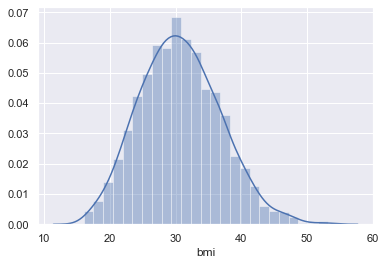

In [17]:
# Disctribution of bmi
sns.distplot(insurance_df['bmi'])

#### From the above, bmi plot is uniformly distributed. Thus, the mean and median values are very close to each other.

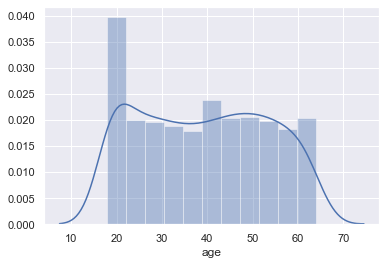

In [18]:
# Distribution of age
sns.distplot(insurance_df['age'])

#### From the above, age plot is non-uniform distribution. The mean and median valies are close to each other

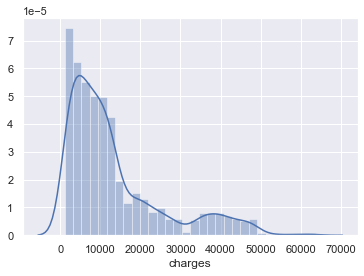

In [19]:
# Distribution of charges
sns.distplot(insurance_df['charges'])

#### From the above, charges plot is right skewed (long-tail on the right side), with mean greater than its median.

### f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

Skewness

1. If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.


2. If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed.


3. If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed.


*Positive Skeness is when the tail on the right side of the distribution is longer or fatter. The mean and median will be greater than the mode.

*Negative Skewness is when the tail of the left side of the distribution is longer or fatter than the tail on the right side. The mean and median will be less than the mode.



In [20]:
print("Summary Statistics - skewness of bmi")
print(insurance_df['bmi'].describe())
print("Skew:  {}".format(skew(insurance_df['bmi'])))
# print("kurtosis:  {}".format(kurtosis(insurance_df['bmi'])))
print("Missing bmi values: {}".format(insurance_df['bmi'].isnull().sum()))


Summary Statistics - skewness of bmi
count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64
Skew:  0.28372857291709386
Missing bmi values: 0


#### From the above, Skewness of bmi, the value is 0.28, which is in between -0.5 and +0.5, the data are fairly symmetrical. 

In [21]:
print("Summary Statistics - skewness of age")
print(insurance_df['age'].describe())
print("Skew:  {}".format(skew(insurance_df['age'])))
# print("kurtosis:  {}".format(kurtosis(insurance_df['age'])))
print("Missing age values: {}".format(insurance_df['age'].isnull().sum()))

Summary Statistics - skewness of age
count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64
Skew:  0.055610083072599126
Missing age values: 0


#### From the above, Skewness of age, the value is 0.0556, which is in between -0.5 and +0.5, the data are fairly symmetrical. 

In [22]:
print("Summary Statistics - skewness of charges")
print(insurance_df['charges'].describe())
print("Skew:  {}".format(skew(insurance_df['charges'])))
# print("kurtosis:  {}".format(kurtosis(insurance_df['charges'])))
print("Missing charges values: {}".format(insurance_df['charges'].isnull().sum()))

Summary Statistics - skewness of charges
count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64
Skew:  1.5141797118745743
Missing charges values: 0


#### From the above, Skewness of charges, the value is 1.5, which is greater than 1 (positively skewed), the data are highly skewed.

### g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

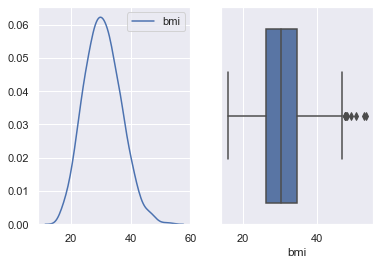

In [23]:
# Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns
f, axes_bmi = plt.subplots(1, 2)
sns.kdeplot(insurance_df['bmi'], ax = axes_bmi[0])
sns.boxplot(insurance_df['bmi'], ax = axes_bmi[1])


#### BMI has a few extreme values.

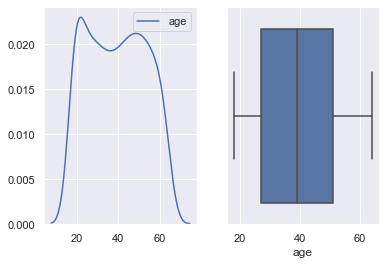

In [24]:
# Checking the presence of outliers in ‘age'
f, axes_age = plt.subplots(1,2)
sns.kdeplot(insurance_df['age'], ax = axes_age[0])
sns.boxplot(insurance_df['age'], ax = axes_age[1])

#### Age does not have extreme values.

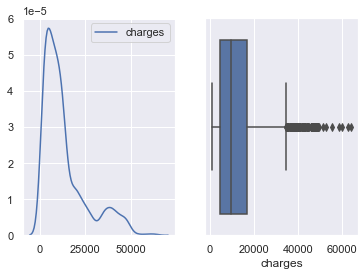

In [25]:
# Checking the presence of outliers in ‘charges'
f, axes_charges = plt.subplots(1, 2)
sns.kdeplot(insurance_df['charges'], ax = axes_charges[0])
sns.boxplot(insurance_df['charges'], ax = axes_charges[1])

#### Charges as it is highly skewed, there are quiet a lot of extreme values.

### h. Distribution of categorical columns (include children)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
         sex  children smoker     region
0     female         0    yes  southwest
1       male         1     no  southeast
2       male         3     no  southeast
3       male         0     no  northwest
4       male         0     no  northwest
...      ...       ...    ...        ...
1333    male         3     no  northwest
1334  female         0     no  northeast
1335  female         0     no  southeast
1336  female         0     no  southwest
1337  female         0    yes  northwest

[1338 rows x 4 columns]


Text(0.5, 1.0, 'Children distribution')

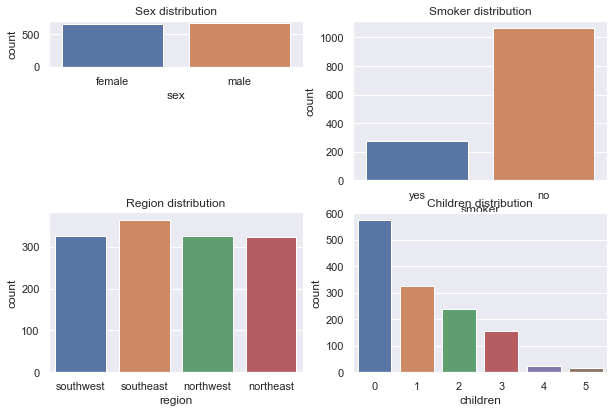

In [26]:
### Distribution of categorical columns including children
print(insurance_df.columns)
cat_df_inc_children = insurance_df[['sex', 'children', 'smoker', 'region']]
print(cat_df_inc_children)

fig = plt.figure(figsize=(10, 10))
axes_sex = fig.add_subplot(10, 2, 1)
sns.countplot(x = 'sex', data = cat_df_inc_children, ax = axes_sex)
plt.title('Sex distribution')

axes_smoker = fig.add_subplot(3, 2, 2)
sns.countplot(x='smoker', data = cat_df_inc_children, ax = axes_smoker)
plt.title('Smoker distribution')

axes_region = fig.add_subplot(3, 2, 3)
sns.countplot(x='region', data = cat_df_inc_children, ax = axes_region)
plt.title('Region distribution')

axes_region = fig.add_subplot(3, 2, 4)
sns.countplot(x='children', data = cat_df_inc_children, ax = axes_region)
plt.title('Children distribution')

#### 1. Gender (number of males & females) distributed evenly.
#### 2. There are a lot more non-smokers than the smokers in the data.
#### 3. Instances are distributed evenly accross all regions.
#### 4. Most instances have less than 2 children and very few have 4 or 5 children Bi-variate distribution of every possible attribute pair.

### i. Pair plot that includes all the columns of the data frame

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


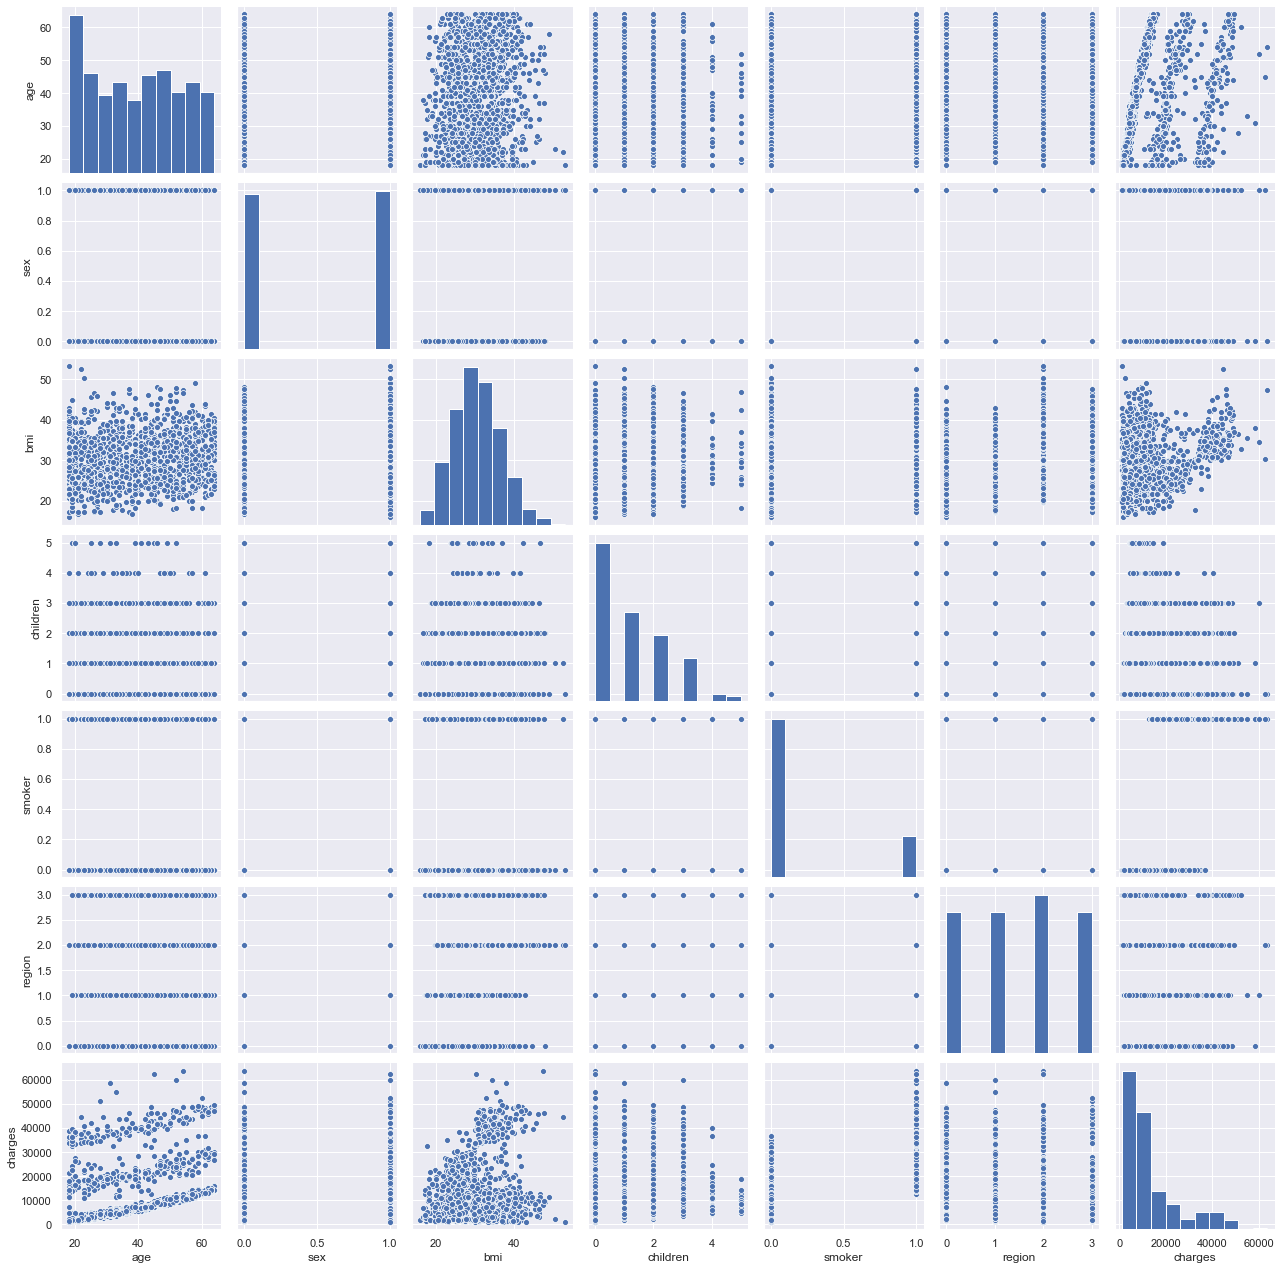

In [27]:
# bivariate plot between each pair of dimensions with the help of pairplot()
print(insurance_df.columns)
# Label encoding the variables before doing a pairplot because pairplot ignores strings
insurance_df_encoded = copy.deepcopy(insurance_df)
insurance_df_encoded.loc[:,['sex', 'smoker', 'region']] = insurance_df_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 
sns.pairplot(insurance_df_encoded)  # pair plot
# plt.title(' Pair Plot')

# Step 04: Answer the following questions with statistical evidence

### a. Do charges of people who smoke differ significantly from the people who don't?

no     1064
yes     274
Name: smoker, dtype: int64


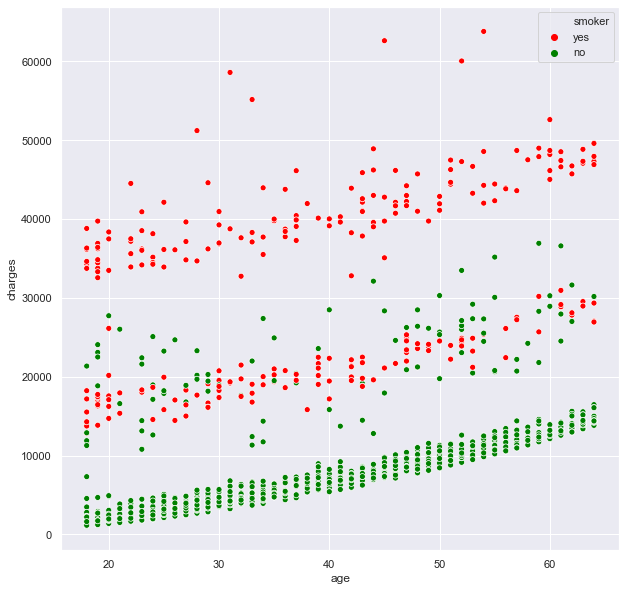

In [28]:
# First let us count the smokers 7 non-smoker again
print(insurance_df.smoker.value_counts())

# Now draw scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(10, 10))
sns.scatterplot(insurance_df.age, insurance_df.charges, hue=insurance_df.smoker, palette= ['red','green'], alpha=1)

#### Note: From the above scatter plot, visual evidences, it is clear that the charges for people who smoke differ from the people who don't smoke.

In [29]:
# Hypothesis Testing: T-test to check dependency of smoking on charges
Ho = "Charges of smoker and non-smoker are same"           # Stating the Null Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"   # Stating the Alternate Hypothesis

x = np.array(insurance_df[insurance_df.smoker == 'yes'].charges)  # Selecting charges corresponding to smokers as an array
y = np.array(insurance_df[insurance_df.smoker == 'no'].charges) # Selecting charges corresponding to non-smokers as an array

t, p_value  = stats.ttest_ind(x, y, axis = 0)  #Performing an Independent t-test on two samples (charges for smokers & non-smokers)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are not the same as the p_value (8.271435842177219e-283) < 0.05


#### Smokers seem to claim significantly more money than non-smokers

### b. Does bmi of males differ significantly from that of females?

male      676
female    662
Name: sex, dtype: int64


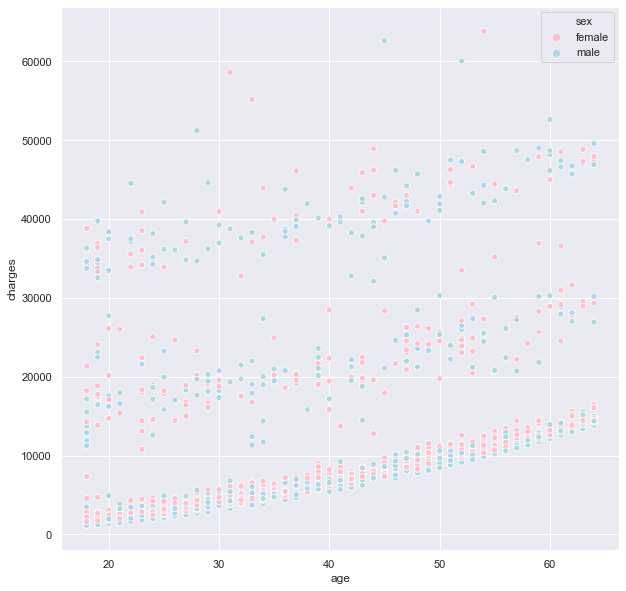

In [30]:
# First let us count the males and females again. Cheking the distribution of males and females.
print(insurance_df.sex.value_counts())

# Now draw scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(10, 10))
sns.scatterplot(insurance_df.age, insurance_df.charges, hue=insurance_df.sex, palette= ['pink','lightblue'], alpha=1)

#### Note: Visually, there is no apparent relation between gender and charges

In [31]:
# Hypothesis Testing: T-test to check dependency of bmi on gender
Ho = "Gender has no effect on bmi"   # Stating the Null Hypothesis
Ha = "Gender has an effect on bmi"   # Stating the Alternate Hypothesis

x = np.array(insurance_df[insurance_df.sex == 'male'].bmi)  # Selecting bmi values corresponding to males as an array
y = np.array(insurance_df[insurance_df.sex == 'female'].bmi) # Selecting bmi values corresponding to females as an array

t, p_value  = stats.ttest_ind(x, y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(5)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(5)}) > 0.05')

Gender has no effect on bmi as the p_value (0.08998) > 0.05


#### BMI of both the genders are identical

### c. Is the proportion of smokers significantly different in different genders?

In [32]:
# Hypothesis Testing: Chi_square test to check if smoking habits are different for different genders
Ho = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(insurance_df['sex'], insurance_df['smoker'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(5)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(5)}) > 0.05')
print('')
print('Contingency Table: Smoker vs Gender(Sex)\r\n', crosstab)

Gender has an effect on smoking habits as the p_value (0.00655) < 0.05

Contingency Table: Smoker vs Gender(Sex)
 smoker   no  yes
sex             
female  547  115
male    517  159


#### Proportion of smokers in males is significantly different from that of the females

### d. Is the distribution of bmi across women with no children, one child and two children, the same?

In [33]:
# Test to see if the distributions of bmi values for females having different number of children, are significantly different

Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis


female_df = copy.deepcopy(insurance_df[insurance_df['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero, one, two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')


No. of children has no effect on bmi as the p_value (0.716) > 0.05


#### BMI is not changed by the number of children a women has.